In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler 
from keras.layers import Dense , Dropout, LSTM
from keras.models import Sequential

In [27]:
ab = yf.Ticker("TSLA")

In [28]:
df = ab.history(start="2009-01-01", end="2023-06-01" ,interval='1d')

In [29]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [30]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-24 00:00:00-04:00,182.229996,184.220001,178.220001,182.899994,137605100,0.0,0.0
2023-05-25 00:00:00-04:00,186.539993,186.779999,180.580002,184.470001,96870700,0.0,0.0
2023-05-26 00:00:00-04:00,184.619995,198.600006,184.529999,193.169998,162061500,0.0,0.0
2023-05-30 00:00:00-04:00,200.100006,204.479996,197.529999,201.160004,128818700,0.0,0.0
2023-05-31 00:00:00-04:00,199.779999,203.949997,195.119995,203.929993,150711700,0.0,0.0


In [31]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [32]:
df = df.drop(['Dividends','Stock Splits'],axis=1)
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500


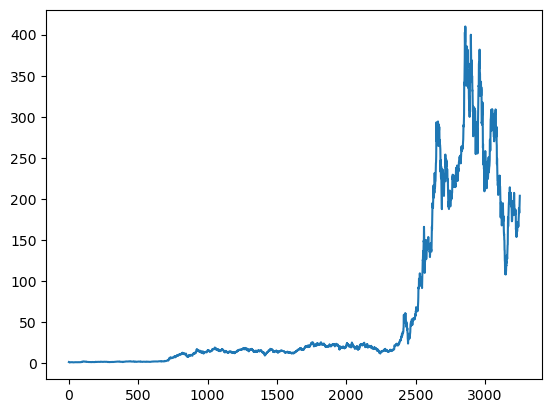

In [36]:
plt.plot(df.Close)

In [244]:
ma100=df.Close.rolling(100).mean()

In [245]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3248    173.8585
3249    174.4714
3250    175.3221
3251    176.1973
3252    177.1332
Name: Close, Length: 3253, dtype: float64

In [246]:
plt.figure(figsize=[12,6])

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

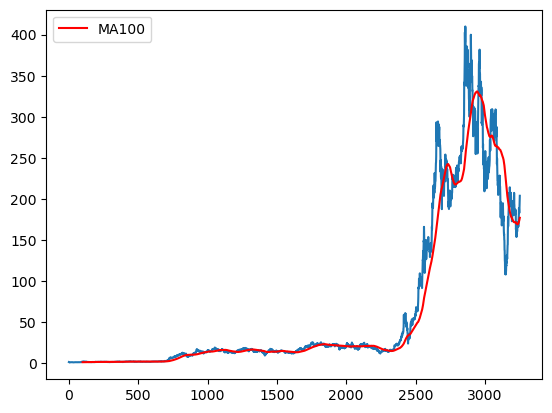

In [247]:
plt.plot(df.Close)
plt.plot(ma100,'r',label='MA100')
plt.legend()
plt.show()

In [248]:
ma200=df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3248    201.221000
3249    200.726683
3250    200.220750
3251    199.793400
3252    199.312900
Name: Close, Length: 3253, dtype: float64

NameError: name 'ma100' is not defined

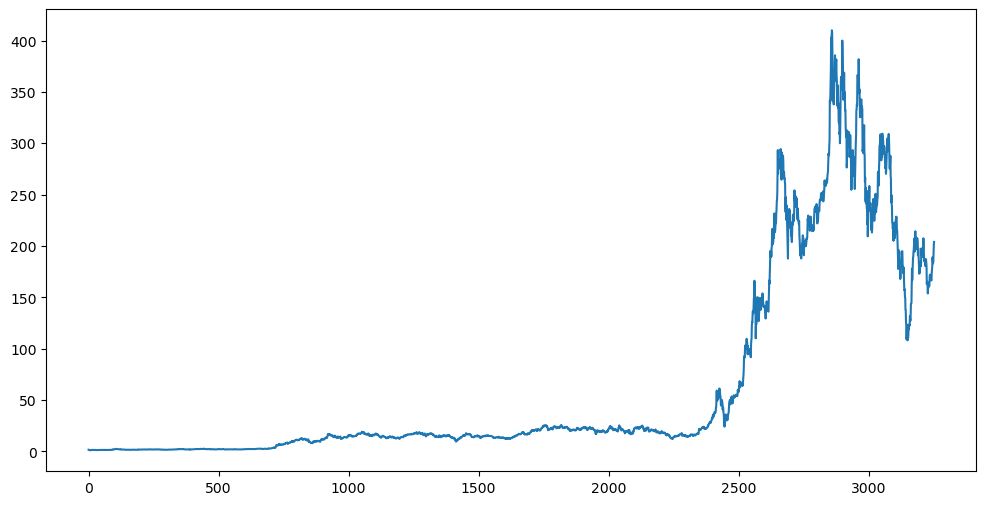

In [33]:
plt.figure(figsize=[12,6])
plt.plot(df.Close)
plt.plot(ma100,'r',label='MA100')
plt.plot(ma200,'y',label='MA200')
plt.legend()
plt.show()

In [250]:
data_train = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(2277, 1)
(976, 1)


In [251]:
df.shape

(3253, 6)

In [252]:
data_test.tail()

,Close
3248,182.899994
3249,184.470001
3250,193.169998
3251,201.160004
3252,203.929993


In [253]:
from sklearn.preprocessing import MinMaxScaler 
scaler= MinMaxScaler(feature_range = (0,1))

In [254]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.02191227],
       [0.02174975],
       [0.01668473],
       ...,
       [0.6210184 ],
       [0.64382444],
       [0.64079084]])

In [37]:
x_train=[]
y_train=[]

for i in range(100,data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
    
x_train, y_train=np.array(x_train),np.array(y_train)

NameError: name 'data_train_array' is not defined

In [39]:
from keras.layers import Dense , Dropout, LSTM
from keras.models import Sequential

In [40]:
model = Sequential()
model.add(LSTM(units = 50,activation = 'relu', return_sequences = True,
              input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units = 60,activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units = 120,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

AttributeError: 'list' object has no attribute 'shape'

In [258]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
69/69 [==============================] - 7s 40ms/step - loss: 0.0484
Epoch 2/50
69/69 [==============================] - 3s 49ms/step - loss: 0.0125
Epoch 3/50
69/69 [==============================] - 3s 50ms/step - loss: 0.0104
Epoch 4/50
69/69 [==============================] - 3s 43ms/step - loss: 0.0086
Epoch 5/50
69/69 [==============================] - 3s 41ms/step - loss: 0.0091
Epoch 6/50
69/69 [==============================] - 3s 43ms/step - loss: 0.0092
Epoch 7/50
69/69 [==============================] - 3s 39ms/step - loss: 0.0081
Epoch 8/50
69/69 [==============================] - 3s 38ms/step - loss: 0.0093
Epoch 9/50
69/69 [==============================] - 3s 46ms/step - loss: 0.0069
Epoch 10/50
69/69 [==============================] - 3s 42ms/step - loss: 0.0066
Epoch 11/50
69/69 [==============================] - 3s 45ms/step - loss: 0.0069
Epoch 12/50
69/69 [==============================] - 3s 41ms/step - loss: 0.0063
Epoch 13/50
69/69 [==================

In [276]:
model.save('keras_model.h5')

C:\Users\ANTARUPA\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [277]:
data_test.head()

,Close
2277,16.990667
2278,16.902666
2279,17.212000
2280,17.045334
2281,17.344667


In [278]:
past_100Days=data_train.tail(100)

In [262]:
final_df = pd.concat([past_100Days, data_test], ignore_index=True)

C:\Users\ANTARUPA\AppData\Local\Temp\ipykernel_35948\3532233296.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [263]:
final_df.head()

,Close
0,19.647333
1,19.917999
2,19.857332
3,20.982668
4,21.325333


In [264]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.01938505],
       [0.02006505],
       [0.01991264],
       ...,
       [0.45532929],
       [0.47540273],
       [0.48236183]])

In [265]:
input_data.shape

(1076, 1)

In [266]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test, y_test=np.array(x_test),np.array(y_test)

In [267]:
print(x_test.shape)
print(y_test.shape)

(976, 100, 1)
(976,)


In [268]:
y_predict = model.predict(x_test)

31/31 [==============================] - 1s 26ms/step


In [269]:
y_predict.shape

(976, 1)

In [270]:
scaler.scale_

array([0.00251232])

In [271]:
scale_factor=1/0.00331268
y_predict=y_predict*scale_factor
y_test=y_test*scale_factor

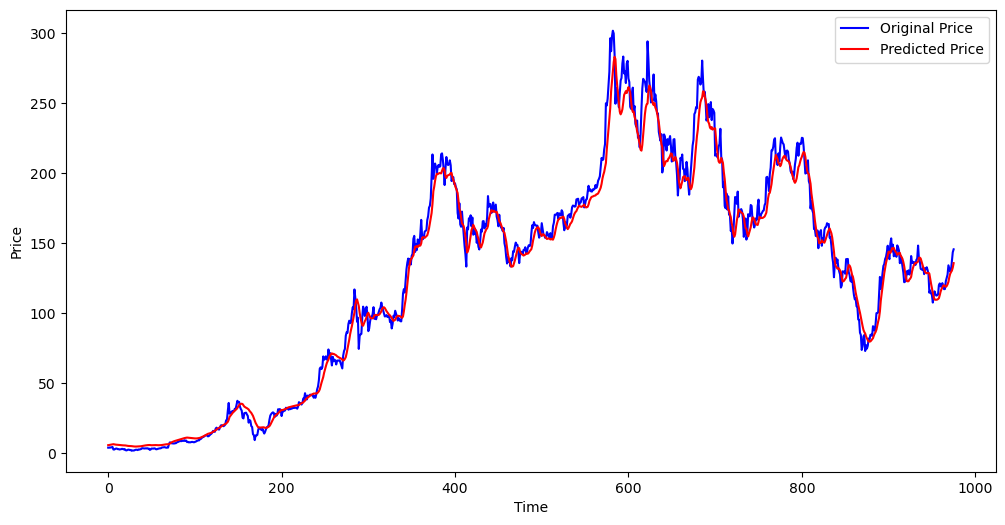

In [272]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predict,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()